In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

### Mecab 설치

In [2]:
! git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git


Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 91 (delta 43), reused 22 (delta 6), pack-reused 0
Unpacking objects: 100% (91/91), done.


In [3]:
ls

drive/  Mecab-ko-for-Google-Colab/  sample_data/


In [5]:
cd Mecab-ko-for-Google-Colab/

/content/Mecab-ko-for-Google-Colab


In [6]:
ls

images/                                    LICENSE
install_mecab-ko_on_colab190912.sh         README.md
install_mecab-ko_on_colab_light_210108.sh


In [ ]:
! bash install_mecab-ko_on_colab190912.sh

In [1]:
# mecab 테스트하기
from konlpy.tag import Mecab
mecab = Mecab()
text = u"""colab에서 mecab테스트 중입니다!"""
mecab.morphs(text)

['colab', '에서', 'mecab', '테스트', '중', '입니다', '!']

### 필요한 라이브러리들 설치
- keras/tensorflow
- numpy, pandas, matplotlib
- sklearn

In [ ]:
!pip install tensorflow
!pip install keras


In [2]:
import keras
import tensorflow as tf
print(keras.__version__)
print(tf.__version__)

Using TensorFlow backend.


2.3.0
1.15.0


In [12]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scikit-learn

#### 라이브러리 import

In [1]:

import os, json, glob, sys
import pandas as pd
import numpy as np
from keras.utils import np_utils
import matplotlib.pyplot as plt
import matplotlib as mpl

import tensorflow as tf

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Flatten, Dropout, Input, Conv1D, MaxPooling1D, GlobalMaxPool1D
from keras.utils import np_utils
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split

from konlpy.tag import Mecab
mecab = Mecab()


Using TensorFlow backend.


#### Dataset 불러오기

In [6]:
path = "./web"
file_list = os.listdir(path)
names = [file[:-4] for file in file_list]
names

['곤충',
 '행정_기관_단체',
 '한국_철학_윤리',
 '기타종교',
 '커피_차',
 '클래식',
 '영화',
 '군사',
 '부동산',
 '게임',
 '만화',
 '사회복지',
 '음악용어',
 '직업',
 '아프리카',
 '독일문학',
 '무역',
 '건축물',
 '육아',
 '북아메리카',
 '건설_토목',
 '농학',
 '프랑스문학',
 '영미문학',
 '중동_역사_문화',
 '한국_민속',
 '무기',
 '속담',
 '기계_자동차_금속',
 '국제기구',
 '외교',
 '이슬람교',
 '패션',
 '경제',
 '댄스_무용',
 '동물',
 '주류',
 '한국_역사_문화',
 '생명과학',
 '호텔',
 '법',
 '북한문학',
 '아시아',
 '남아메리카',
 '헤어',
 '서양_철학_윤리',
 '불교',
 '정치',
 '재료',
 '교양영어사전',
 '명화',
 '심리',
 '화학',
 '수학',
 '물리학',
 '세계_역사_문화',
 '세계음식',
 '중국문학',
 '미술',
 '한국음식',
 '의학',
 '환경',
 '색채',
 '드라마',
 '한국문학',
 '아시아_역사_문화',
 '교양_인문',
 '질병',
 '천문학',
 '뮤지컬',
 '식물',
 '인테리어',
 '오세아니아',
 '전시관',
 '악기',
 '일본문학',
 '약학',
 'IT',
 '동양_철학_윤리',
 '회계_세무',
 '지구과학',
 '음악사',
 '공예',
 '유럽',
 '세계문학',
 '한국',
 '유럽_역사_문화',
 '바둑',
 '기독교',
 '중동',
 '기업_브랜드']

In [7]:
df = pd.DataFrame(columns=['topic', 'sub_topic', 'contents', 'label'])

idx = 0
topic_index = dict()
for name in names:
    temp_df = pd.read_csv(path+"/"+name+'.csv', encoding= 'cp949', names=['url', 'sub_topic', 'contents'])
    len_ = len(temp_df)
    temp_df['topic'] = [name]*len_
    temp_df['label'] = [idx]*len_
    temp_df = temp_df.loc[:, ['topic', 'sub_topic', 'contents','label']]
    df = pd.concat([df, temp_df])
    topic_index[name] = idx
    idx += 1
    del temp_df
df

,topic,sub_topic,contents,label
0,곤충,소금쟁이,몸 길이는 11 16mm이며 몸은 흑갈색 또는 검은색 바탕에 갈색 무늬를 띠고 은빛...,0
1,곤충,물방개,몸 길이는 34 42mm이며 몸은 약한 녹색 광택을 띠는 흑색인데 몸의 가장자리는 ...,0
2,곤충,쌀바구미,몸 길이는 3 4mm이고 흑갈색으로서 앞가슴의 등면과 앞날개 위에 원형의 작은 점...,0
3,곤충,동애등에,몸 길이는 13 20mm이며 전체적인 색상은 흑색이다. 얼굴은 흑갈색으로 길이가 매...,0
4,곤충,거저리,몸 길이는 13 17mm이며 몸은 흑갈색이고 광택이 있으며 길쭉한 모양이다. 앞가...,0
...,...,...,...,...
3843,기업_브랜드,패러마운트커뮤니케이션스,1994년 미디어그룹 비아콤에 합병된 미디어 커뮤니케이션회사,90
3844,기업_브랜드,대조선저마제사회사,삼과 모시를 합사하여 외국에 수출하기 위해 1897년 설립된 회사,90
3845,기업_브랜드,삼정사,조선 왕실이 1899년 세운 최초의 인삼전매회사다.,90
3846,기업_브랜드,핀시데르,자동차산업에 필요한 평면철강제품을 생산하는 데 주력해온 이탈리아의 대형 회사,90


In [8]:
# 데이터 섞기
df_shuffled=df.sample(frac=1).reset_index(drop=True)
df_shuffled.head()

,topic,sub_topic,contents,label
0,세계음식,멜튼모우브레이포크파이,최초로 출간된 포크 파이 레시피는 14세기 잉글랜드의 궁정 요리책에 나타난다. 익반...,56
1,의학,손톱,손톱을 볼 때 체크할 필요성이 있는 소견은 곤봉손가락 clubbed finger 같...,60
2,생명과학,아미노아실전달효소,EC 2.3.2군에 속하는 효소로 아미노아실기를 전달해서 에스테르 또는 아미드를 형...,38
3,의학,말초순환부전,말초혈관이 확장해서 혈액 정체가 일어나거나 체액 혈장 전혈이 급격하게 없어져 혈액량...,60
4,북아메리카,뉴프랑스와캐나다식민지시대15341763,Cartier의 첫 번째 항해로 1534년 신대륙에 대한 프랑스의 관심은 향신료의 ...,19


In [9]:
# 데이터 셋 크기
len(df)

386367

#### Data preprocessing

In [10]:
# 데이터 셋을 input, output구별
X = df_shuffled.loc[:, 'contents'].values
Y = df_shuffled.loc[:, 'label'].values

In [11]:
topic_index

{'곤충': 0,
 '행정_기관_단체': 1,
 '한국_철학_윤리': 2,
 '기타종교': 3,
 '커피_차': 4,
 '클래식': 5,
 '영화': 6,
 '군사': 7,
 '부동산': 8,
 '게임': 9,
 '만화': 10,
 '사회복지': 11,
 '음악용어': 12,
 '직업': 13,
 '아프리카': 14,
 '독일문학': 15,
 '무역': 16,
 '건축물': 17,
 '육아': 18,
 '북아메리카': 19,
 '건설_토목': 20,
 '농학': 21,
 '프랑스문학': 22,
 '영미문학': 23,
 '중동_역사_문화': 24,
 '한국_민속': 25,
 '무기': 26,
 '속담': 27,
 '기계_자동차_금속': 28,
 '국제기구': 29,
 '외교': 30,
 '이슬람교': 31,
 '패션': 32,
 '경제': 33,
 '댄스_무용': 34,
 '동물': 35,
 '주류': 36,
 '한국_역사_문화': 37,
 '생명과학': 38,
 '호텔': 39,
 '법': 40,
 '북한문학': 41,
 '아시아': 42,
 '남아메리카': 43,
 '헤어': 44,
 '서양_철학_윤리': 45,
 '불교': 46,
 '정치': 47,
 '재료': 48,
 '교양영어사전': 49,
 '명화': 50,
 '심리': 51,
 '화학': 52,
 '수학': 53,
 '물리학': 54,
 '세계_역사_문화': 55,
 '세계음식': 56,
 '중국문학': 57,
 '미술': 58,
 '한국음식': 59,
 '의학': 60,
 '환경': 61,
 '색채': 62,
 '드라마': 63,
 '한국문학': 64,
 '아시아_역사_문화': 65,
 '교양_인문': 66,
 '질병': 67,
 '천문학': 68,
 '뮤지컬': 69,
 '식물': 70,
 '인테리어': 71,
 '오세아니아': 72,
 '전시관': 73,
 '악기': 74,
 '일본문학': 75,
 '약학': 76,
 'IT': 77,
 '동양_철학_윤리': 78,
 '회계_세무': 79,
 

In [12]:
unique_elements, counts_elements = np.unique(Y, return_counts=True)
print("각 레이블에 대한 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 레이블에 대한 빈도수:
[[0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
  27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
  51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74
  75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90]
 [1522 1525 1006 4545 2837 1001 1499 6516 2721 661 4854 4665 5588 8052
  1346 942 1893 2826 392 1520 10005 9095 1009 637 2527 6098 5444 282 7652
  357 1278 75 9447 3118 3275 389 9737 9786 9396 1706 3858 488 9963 2576
  341 9960 9294 4504 1072 1003 9690 9628 9875 2073 2449 7559 6413 9050
  6403 6681 9406 3268 1417 594 9442 2439 3564 4622 502 318 5834 1711 369
  2588 1375 1045 10005 7398 3811 1542 4418 1265 949 9922 7276 9991 4231
  2104 9530 1479 3848]]


<BarContainer object of 91 artists>

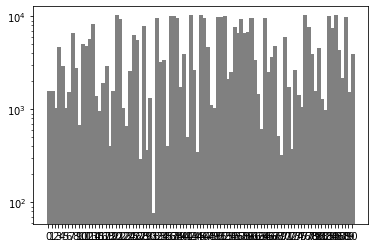

In [13]:
plt.bar(unique_elements, counts_elements, width=0.3, align='edge', color="blue",
        edgecolor="gray", linewidth=3, tick_label=unique_elements, log=True)

In [14]:
print(len(X))
print(len(Y))

386367
386367


In [15]:
# stop word 불러오기
path ='./korean_stopwords.txt'
f = open(path, 'r', encoding='utf-8')
stop_words = []
while True:
    line = f.readline()
    if not line: break
    stop_words.append(line.split()[0])
f.close()

In [16]:
stop_words[:5]

['이', '있', '하', '것', '들']

In [17]:
new_X = []
delete_Y_idxs = []
for idx in range(len(X)):
  # 1. 토큰화
  temp = mecab.morphs(X[idx])
  # 2. 불용어 제거
  temp = [i for i in temp if i not in stop_words and i != '.']
  if temp:
      new_X.append(temp)
  else:
    delete_Y_idxs.append(idx)


In [18]:
print(len(new_X))
print(len(X))
print(len(delete_Y_idxs))


385030
386367
1337


In [19]:
# 필요없는 부분 제거
new_Y = np.delete(Y, delete_Y_idxs)
print(len(new_X))
print(len(X))
print(len(new_Y))
print(len(Y))

385030
386367
385030
386367


In [20]:
new_X[4]

['Cartier',
 '의',
 '첫',
 '째',
 '항해',
 '로',
 '1534',
 '신대륙',
 '에',
 '대한',
 '프랑스',
 '의',
 '관심',
 '은',
 '향신료',
 '의',
 '땅',
 '아시아',
 '로',
 '는',
 '서쪽',
 '항로',
 '를',
 '찾',
 '고자',
 '했',
 '던',
 '프랑수아',
 '1',
 '세',
 '부터',
 '시작',
 '1534',
 '프랑수아',
 '1',
 '세',
 '의',
 '지시',
 '를',
 '은',
 'Jacques',
 'Cartier',
 '는',
 '뉴펀들랜드',
 '지역',
 '과',
 'St',
 'Lawrence',
 '만',
 '지역',
 '을',
 '항해',
 'Gaspe',
 'Bay',
 '퀘',
 '백',
 '지역',
 '에',
 '도착',
 'Long',
 'Live',
 'the',
 'King',
 'of',
 'France',
 '라고',
 '적힌',
 '십자가',
 '를',
 '설치',
 '여',
 '프랑스',
 '영토',
 '임',
 '을',
 '주장']

In [21]:
# X 정수 encoding하기
max_word =250000
max_len = 1000 #max_len = 500

tok = Tokenizer(num_words = max_word)
tok.fit_on_texts(new_X)
sequences = tok.texts_to_sequences(new_X)
print(len(tok.word_index))

418294


각 기사의 단어 수가 제각각 다르므로 이를 동일하게 맞춰야 한다.
이때는 다음과 같이 데이터 전처리 함수 sequence()를 이용한다.

In [22]:
sequences_matrix  = sequence.pad_sequences(sequences, maxlen=max_len)
print(sequences_matrix)
print(len(sequences_matrix[0]))

[[    0     0     0 ...   834  7754     5]
 [    0     0     0 ...     1  1973   472]
 [    0     0     0 ...     7  1469    20]
 ...
 [    0     0     0 ...    51   255  2525]
 [    0     0     0 ...   126    26 32587]
 [    0     0     0 ...   432     8     5]]
1000


In [23]:
type(sequences_matrix)

numpy.ndarray

In [24]:
type(new_Y)

numpy.ndarray

In [25]:
print(len(sequences_matrix))

385030


In [26]:
# new_Y 데이터에 원-핫 인코딩 처리를 하여 데이터 전처리 과정을 마친다.
nb_classes = len(set(new_Y))
print(nb_classes)
y = np_utils.to_categorical(new_Y, nb_classes)


91


In [27]:
print(y[100])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [28]:
X_train, X_test, y_train, y_test = train_test_split(sequences_matrix, y, test_size=0.2)

In [29]:
print(X_train.shape)
print(y_train.shape)

(308024, 1000)
(308024, 91)


In [30]:
print(X_test.shape)
print(y_test.shape)

(77006, 1000)
(77006, 91)


##### training set X : 308024, 1000
##### training set Y : 308024, 91

##### training set X : 77006, 1000
##### training set Y : 77006, 91

In [32]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tok, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [39]:
import json
print(topic_index)
json_object = json.dumps(topic_index, indent = 4)
with open('token2.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(json_object, ensure_ascii=False))

{'곤충': 0, '행정_기관_단체': 1, '한국_철학_윤리': 2, '기타종교': 3, '커피_차': 4, '클래식': 5, '영화': 6, '군사': 7, '부동산': 8, '게임': 9, '만화': 10, '사회복지': 11, '음악용어': 12, '직업': 13, '아프리카': 14, '독일문학': 15, '무역': 16, '건축물': 17, '육아': 18, '북아메리카': 19, '건설_토목': 20, '농학': 21, '프랑스문학': 22, '영미문학': 23, '중동_역사_문화': 24, '한국_민속': 25, '무기': 26, '속담': 27, '기계_자동차_금속': 28, '국제기구': 29, '외교': 30, '이슬람교': 31, '패션': 32, '경제': 33, '댄스_무용': 34, '동물': 35, '주류': 36, '한국_역사_문화': 37, '생명과학': 38, '호텔': 39, '법': 40, '북한문학': 41, '아시아': 42, '남아메리카': 43, '헤어': 44, '서양_철학_윤리': 45, '불교': 46, '정치': 47, '재료': 48, '교양영어사전': 49, '명화': 50, '심리': 51, '화학': 52, '수학': 53, '물리학': 54, '세계_역사_문화': 55, '세계음식': 56, '중국문학': 57, '미술': 58, '한국음식': 59, '의학': 60, '환경': 61, '색채': 62, '드라마': 63, '한국문학': 64, '아시아_역사_문화': 65, '교양_인문': 66, '질병': 67, '천문학': 68, '뮤지컬': 69, '식물': 70, '인테리어': 71, '오세아니아': 72, '전시관': 73, '악기': 74, '일본문학': 75, '약학': 76, 'IT': 77, '동양_철학_윤리': 78, '회계_세무': 79, '지구과학': 80, '음악사': 81, '공예': 82, '유럽': 83, '세계문학': 84, '한국': 85, '유럽_역사_문화': 86,

### Model 설계 및 훈련

In [40]:
model = Sequential()

model.add(Embedding(max_word, 64, input_length=max_len))
model.add(LSTM(60, return_sequences=True))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [41]:
model_dir = './model'
if not os.path.exists(model_dir):
    os.mkdir(model_dir)
model_path = model_dir + "/Naver_dict_l2stm.h5"

In [42]:
model_path

'./model/Naver_dict_l2stm.h5'

In [43]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint(filepath=model_path, monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1000, 64)          16000000  
_________________________________________________________________
lstm_1 (LSTM)                (None, 1000, 60)          30000     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 60)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                3050      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 91)               

In [45]:
history = model.fit(X_train, y_train, batch_size=256, epochs=50, callbacks=[es, mc], validation_split=0.2)


Train on 246419 samples, validate on 61605 samples
Epoch 1/50
246419/246419 [==============================] - 803s 3ms/step - loss: 3.0855 - accuracy: 0.2354 - val_loss: 1.8672 - val_accuracy: 0.5197

Epoch 00001: val_accuracy improved from -inf to 0.51970, saving model to ./model/Naver_dict_l2stm.h5
Epoch 2/50
246419/246419 [==============================] - 797s 3ms/step - loss: 1.8457 - accuracy: 0.5067 - val_loss: 1.3950 - val_accuracy: 0.6325

Epoch 00002: val_accuracy improved from 0.51970 to 0.63246, saving model to ./model/Naver_dict_l2stm.h5
Epoch 3/50
246419/246419 [==============================] - 797s 3ms/step - loss: 1.4281 - accuracy: 0.6096 - val_loss: 1.4578 - val_accuracy: 0.6189

Epoch 00003: val_accuracy did not improve from 0.63246
Epoch 4/50
246419/246419 [==============================] - 796s 3ms/step - loss: 1.2010 - accuracy: 0.6644 - val_loss: 1.1891 - val_accuracy: 0.6927

Epoch 00004: val_accuracy improved from 0.63246 to 0.69267, saving model to ./model/

In [46]:
print("정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))

77006/77006 [==============================] - 118s 2ms/step
정확도 : 0.7280


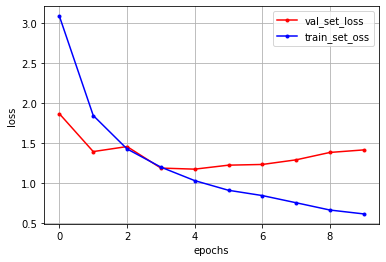

In [47]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_oss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

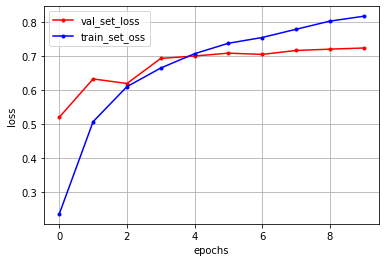

In [48]:
y_vloss = history.history['val_accuracy']
y_loss = history.history['accuracy']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_oss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()